In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


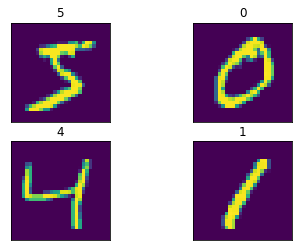

In [ ]:
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
m1=Sequential()
m1.add(Conv2D(64,(3,3),strides=(2,2),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Conv2D(128,(2,2),activation='relu'))
m1.add(MaxPooling2D(pool_size=(3,3)))
m1.add(Flatten())
m1.add(Dense(128,activation='relu'))
m1.add(Dense(10,activation='softmax'))

In [ ]:
m1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h1=m1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3252 - accuracy: 0.8943 - val_loss: 0.2435 - val_accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2530 - accuracy: 0.9188 - val_loss: 0.2132 - val_accuracy: 0.9358
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2149 - accuracy: 0.9303 - val_loss: 0.2103 - val_accuracy: 0.9359
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1918 - accuracy: 0.9380 - val_loss: 0.1989 - val_accuracy: 0.9358
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1764 - accuracy: 0.9424 - val_loss: 0.1745 - val_accuracy: 0.9458
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1591 - accuracy: 0.9466 - val_loss: 0.2064 - val_accuracy: 0.9379
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1465 - accuracy: 0.9518 - val_loss: 0.1756 -

In [ ]:
res=pd.DataFrame(h1.history)
res['Epochs']=h1.epoch
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
5,0.159090,0.946583,0.206413,0.9379,5
6,0.146500,0.951817,0.175620,0.9460,6
7,0.136868,0.955767,0.168470,0.9485,7
8,0.125380,0.958567,0.194890,0.9409,8
9,0.118185,0.960917,0.176267,0.9467,9


In [ ]:
y_pred=m1.predict(x_test)
y_pred[0]

array([1.1772668e-07, 2.2361722e-07, 1.2449789e-04, 4.7395038e-06,
       3.7589993e-07, 2.1199554e-07, 1.7685048e-10, 9.9986899e-01,
       1.6136941e-07, 5.8041292e-07], dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=1)

In [ ]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9])

In [ ]:
y_test1=y_test.argmax(axis=1)

In [ ]:
y_test1[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

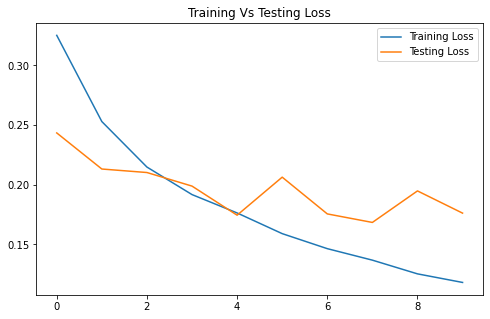

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(res['Epochs'],res['loss'],label='Training Loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing Loss')
plt.title('Training Vs Testing Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_pred,y_test1))
print(classification_report(y_pred,y_test1))

[[ 951    0    3    0    6    9   21    1    0    6]
 [   1 1125    3    1    4    5    5    1    4    0]
 [   5    4  949   24    2    5    2   22    5    6]
 [   0    2   34  970    0   14    0   15    7    4]
 [   5    0    1    0  921    5    2    0    3    1]
 [   2    0    1    3    4  805    5    0   12   20]
 [   6    1    0    0   22    6  912    0    4    1]
 [   9    1   36   11    3    9    0  986    3    7]
 [   1    2    5    1    8   24    6    2  923   39]
 [   0    0    0    0   12   10    5    1   13  925]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       997
           1       0.99      0.98      0.99      1149
           2       0.92      0.93      0.92      1024
           3       0.96      0.93      0.94      1046
           4       0.94      0.98      0.96       938
           5       0.90      0.94      0.92       852
           6       0.95      0.96      0.95       952
           7       0.96      0.93   